<a href="https://colab.research.google.com/github/antonvandike/Simulacion-II/blob/main/Metodo_de_Monte_Carlo/Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1

 Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma
probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30].\\

 Determínese la probabilidad de que el tiempo que una persona espere a la otra sea
como máximo 10.




### Solucion por simulación

**Paso 1.**

Tenemos dos variables: $X_1$ y $X_2$

Que representan el tiempo en el que llegan a la cita entre 0 y 30 min

**Paso 2 y 3.**

Sean $X_1$ y $X_2$ variables aleatorias continuas con distribucion uniforme
\begin{align*}
  X_1 &\sim U(0,30)\\
  X_2 &\sim U(0,30)
\end{align*}

**Paso 4**

Tenemos que la expresion para que cualquier persona espere a la otra como maximo 10 min es

\begin{equation*}
  |X_1-X_2|\leq10
\end{equation*}

In [ ]:
# Librerias a usar

import numpy as np
import math as mt
import random as rd
import matplotlib.pyplot as plt
import scipy.stats as sst


Implementando el codigo de la ecuacion objetivo

In [ ]:
# espera: Funcion que devuelve el valor 1, si es que una de las dos personas espera 10 min o
#         0 si no espero una persona
def espera():
  espera_10 = 0;
  X_1 = rd.uniform(0,30) # La funcion uniform genera un valor aleatorio
  X_2 = rd.uniform(0,30) #

  if abs(X_1 - X_2)<= 10:
    espera_10 = 1
  return(espera_10)

In [ ]:
espera()

0

**Paso 5.** Diseño del experimento

Para estimar la probabilidad del suceso, en N "citas", nesecitamos el numero n de las veces que uno espero al otro 10 min

In [ ]:
# prob_10: Funcion que estima la probablidad de que en N "citas"
# una persona espere a la otra como maximo 10 min
# Devuelve una lista con las probablidad del suceso en N "citas"
def prob_10(N):
  citas = []        #Lista que guarda si una persona espero o no a la otra
  prob_espera = []  #Lista que guarda la probablidad del suceso en N citas

  for x in range(N):
    citas.append(espera())
    prob_espera.append( np.mean(citas) )
  return(prob_espera)

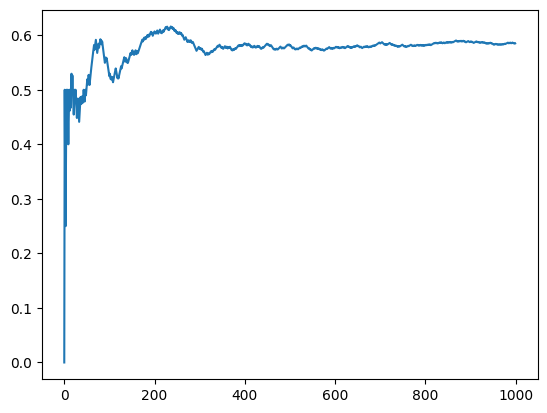

In [ ]:
p = prob_10(1000)
plt.plot(p)
plt.show()

Se puede observar, que con 500 iteraciones se se estabiliza la grafica de las probablidades

La probalidad tiene una media y una desviacion estadar de

In [ ]:
print('x_p =',np.mean(p))
print('s_p =',np.std(p))

x_p = 0.5583270857182258
s_p = 0.03378456531258478


**Paso 6.** Repita el experimento n veces



In [ ]:
# modelo: funcion que repite el experimento n veces
# Devuelve una lista con las probabilidades de cada experimento
def modelo(n):
  l1 = []

  for x in range(n):
    p = prob_10(500)
    l1.append(np.mean(p))

  return(l1)

In [ ]:
Y_1 = modelo(200)

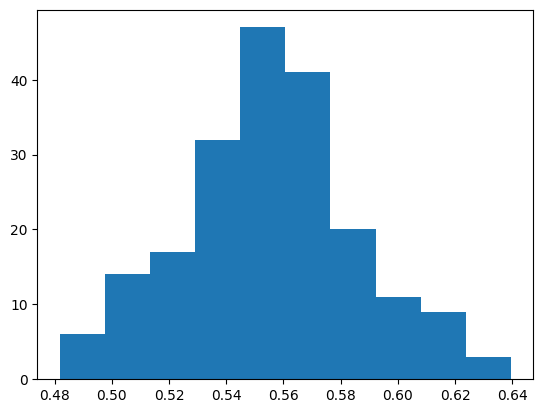

In [ ]:
plt.hist(Y_1)
plt.show()

La probabilidad estimada de que una persona espera a la otra como maximo 10 min es

In [ ]:
y_m = np.mean(Y_1)
print(y_m)

0.5554595854887467


con una desviacion estandar de

In [ ]:
s_m = np.std(Y_1)
print(s_m)

0.030370713210337612


con ese modelo, podemos estimar el numero de veces para repetir dicho modelo con la ecuacion

\begin{equation*}
  N = \left( \frac{2 \sigma z_{\frac{\alpha}{2} }}{\epsilon} \right)^2
\end{equation*}

In [ ]:
N = round(mt.pow((2*s_m*1.96)/(0.01),2))
print(N)

142


entonces con 142 iteraciones obtenemos

In [ ]:
Y_2 = modelo (N)
y2_m = np.mean(Y_2)
s_y2 = np.std(Y_2)
print('y_m2 =',y2_m)
print('s_y2 =',s_y2)

y_m2 = 0.5572435924402199
s_y2 = 0.032287803935003


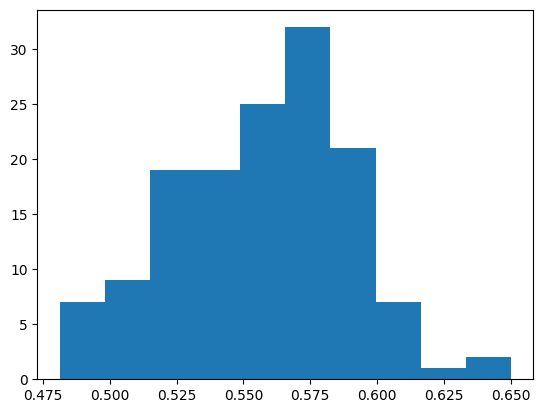

In [ ]:
plt.hist(Y_2)
plt.show()



**Paso 7**. Hallar el intervalo de confianza para la media
\begin{equation*}
  \bar{x} - Z_{\frac{\alpha}{2}} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x} + Z_{\frac{\alpha}{2}} \cdot \frac{s}{\sqrt{n}}
\end{equation*}

El intervalo de confianza para la media de que una persona espera a la otra como maximo 10 min es

In [ ]:
print(y2_m - 1.96*(s_y2/np.sqrt(N)), y2_m + 1.96*s_y2/np.sqrt(N))

0.5519329091003516 0.5625542757800882


entonces, la probabilidad estimada esta dentro del intervalo con una confiabilidad del 95\%

Por tanto, si dos personas quedan citas, la probabilidad de que una persona espera 10 min a la otra, es de

In [ ]:
print('p =',y2_m)

p = 0.5572435924402199


### Solucion analitica


Sean $X_1$ y $X_2$ variables aletarias continuas con  distribucion uniforme \begin{align*}
  X_1 &\sim U(0,30)\\
  X_2 &\sim U(0,30)\\\\
\end{align*}

entonces, sus funciones de densidad son

\begin{align*}
        X_1 = \left\{
        \begin{array}{cl}
        \frac{1}{30} & 0 \leq x \leq 30 \\
        0 & \text{en  otro  caso}
        \end{array}
        \right.\\\\
\end{align*}

\begin{align*}
        X_2 = \left\{
        \begin{array}{cl}
        \frac{1}{30} & 0 \leq x \leq 30 \\
        0 & \text{en  otro  caso}
        \end{array}
        \right.\\\\
\end{align*}

Dado que son variables independientes, su función de densidad conjunta es

\begin{align*}
        f(x_1,x_2) = f(x_1)f(x_2) = \left\{
        \begin{array}{cl}
        \frac{1}{30^2} & 0 \leq x_1 \leq 30 \text{ , } 0\leq x_2 \leq 30 \\
        0 & \text{en  otro  caso}
        \end{array}
        \right.\\\\
\end{align*}

Tenemos que la expresion para que cualquier persona espere a la otra como maximo 10 min es

\begin{equation*}
  |X_1-X_2|\leq10
\end{equation*}


La region comprendida por la ecuacion es

<img src="region_1.png">

Encontrar la funcion de distribucion de $U = |X_1 - X_2|$

Tenemos que la funcion de distribucion de U es

\begin{align*}
  F_{U}(u) &= P(U \leq u)\\
           &= P(|X_1 - X_2|\leq u)
\end{align*}

Tenemos que la region de integracion, es complicada, pero su complemento es mas facil como se muestra en la siguiente figura

<img src="region_2.png">

Entonces, obtenemos

\begin{equation*}
  P(|X_1 - X_2|\leq u) = 1 -P(|X_1 - X_2|> u)
\end{equation*}

dado que se trata de funciones continuas

\begin{equation*}
  P(|X_1 - X_2|\leq u) = 1 -P(|X_1 - X_2|\geq u)
\end{equation*}

como se aprecia en la figura, la zona de integracion es simetrica, entonces podemos integrar cualquier triangulo, y escogemos el superior

\begin{align*}
  P(|X_1 - X_2|\leq u) &= 1 - 2P(X_1 - X_2\leq -u)\\
                       &= 1 - 2\int _{u}^{30} \int _{0}^{x_2 - u} (\frac{1}{30^2}) dx_1dx_2\\
                       &= 1 - \frac{2}{30^2}\int _{u}^{30} (x_2 - u) dx_2\\
                       &= 1 - \frac{2}{30^2}\left.\left( \frac{x_2^2}{2}-ux_2 \right)\right|_{u}^{30}\\
                       &= 1 - \frac{2}{30^2}\left( \frac{30^2}{2}-30u -\frac{u^2}{2}+u^2 \right)\\
                       &= 1 - \frac{2}{30^2}\left( \frac{30^2}{2}-30u + \frac{u^2}{2} \right)\\
                       &= 1 - 1 + \frac{2}{30}u - \frac{u^2}{30^2}\\
                       &= \frac{2}{30}u - \frac{u^2}{30^2}
\end{align*}

entonces

Como para $u<0$, $F_U(u)=0$

y para $u>0$, $F_U(u)=0$

tenemos que la funcion de distribucion de u es

\begin{align*}
        F_U(u) = \left\{
        \begin{array}{cl}
        0 & x < 0 \\
        \frac{2}{30}u - \frac{u^2}{30^2} & 0 \leq u \leq 30\\
        1 & x>30
        \end{array}
        \right.\\\\
\end{align*}

entonces, su al funcion de densidad de u es

\begin{align*}
        f(u) = \frac{d(F_U(u))}{du} = \left\{
        \begin{array}{cl}
        \frac{2}{30} - \frac{2}{30^2}u & 0 \leq u \leq 30 \\
        0 & \text{en otro caso}
        \end{array}
        \right.\\\\
\end{align*}

entonces, la probabilidad de que $U\leq10$ es

\begin{align*}
  P(|X_1 - X_2|\leq10) &= P(U\leq10)\\
                       &= F_U(10)\\
                       &= \frac{5}{9}\\
                       &\approx 0.55555
\end{align*}


### Tecnica de reduccion de varianza

In [ ]:
#Definimos la función de prueba.
def funcion(x):
    return (2/30) - (2/mt.pow(30,2))*x

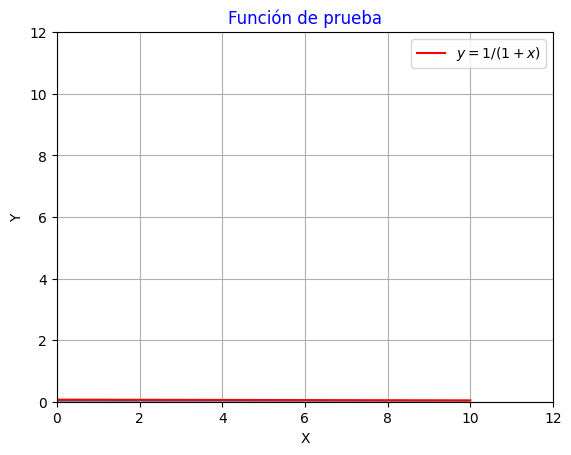

In [ ]:
#Graficamos la función de prueba.
X=np.linspace(0,10,100)
plt.plot(X,funcion(X), color='red', label="$y=1/(1+x)$")
plt.fill_between(X,funcion(X))
plt.legend()
plt.xlim(0.0, 12)
plt.ylim(0.0, 12)
plt.grid(True)
plt.title('Función de prueba', color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
def integ(func=funcion, n=10000):
  muestreo=[]
  suma=[]
  for i in range(n):
    u = np.random.uniform(0,10)
    muestreo.append(u)
    y=funcion(u)
    suma.append(y)



  return (np.mean(suma), np.std(suma)/np.sqrt(n))

print("El valor de la integral es:", 10*round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.5559999999999999
El error estándar es: 6e-05


In [ ]:
def integ(func=funcion, n=10):
    muestreo=[]
    suma=[]
    for i in range(n):
        u = np.random.uniform(0,10)
        muestreo.append(1-u)
        y=-funcion(1-u)
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n)

print("El valor de la integral es:", 10*round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: -0.7481
El error estándar es: 0.0021


In [ ]:
def integ(func=funcion, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u = np.random.uniform(0,10,1)
        muestreo.append(u)
        y=(funcion(u) + funcion(1-u))/2.0
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n)

print("El valor de la integral es:", 10*integ()[0])
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.6555555555555557
El error estándar es: 0.0


In [ ]:
def mc_crudo(funcion, n):
    integral=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        y=(funcion(u) + funcion(1-u))/2.0
        suma.append(y)
        integral.append(np.mean(suma))

    print("El valor de la integral con v antiteticas es:", round(np.mean(suma),5))
    print("El error estándar es:", round(np.std(suma)/np.sqrt(n),5))

    return np.mean(suma), np.std(suma)/np.sqrt(n), integral

In [ ]:
def mc_crudo1(funcion, n):
    integral=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        y=funcion(u)
        suma.append(y)
        integral.append(np.mean(suma))

    print("El valor de la integral es:", round(np.mean(suma),5))
    print("El error estándar es:", round(np.std(suma)/np.sqrt(n),5))

    return np.mean(suma), np.std(suma)/np.sqrt(n), integral

El valor de la integral es: 0.06557
El error estándar es: 2e-05
El valor de la integral con v antiteticas es: 0.06556
El error estándar es: 0.0


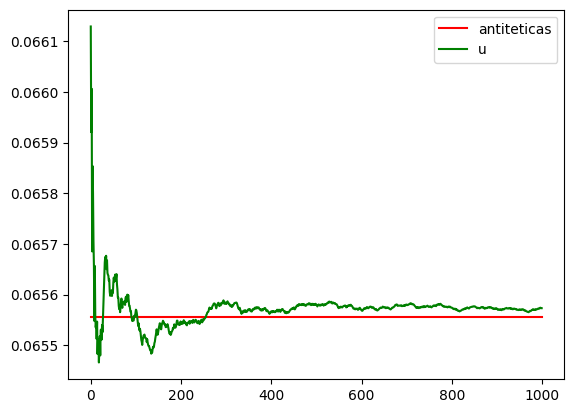

In [ ]:
X1=mc_crudo1(funcion, n=1000)[2]
X=mc_crudo(funcion, n=1000)[2]

plt.plot(X, color='red', label='antiteticas')
plt.plot(X1, color='green', label='u')
plt.legend()